In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [4]:
ev= pd.read_csv("Downloads\Electric_Vehicle_Population_Data.csv")


In [7]:
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [9]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [11]:
ev.isnull().sum()
ev_data= ev.dropna()
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
#ev adoption over time
plt.figure(figsize=(12,6))
ev_adoption_by_year= ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x= ev_adoption_by_year.index, y=ev_adoption_by_year.values,palette='viridis')
plt.title('EV adoption over time')
plt.xlabel('Model Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ev_county_distribution= ev_data['County'].value_counts()
top_counties= ev_county_distribution.head(3).index

#Filtering the data for these top counties
top_counties_data=ev_data[ev_data['County'].isin(top_counties)]

#analyzing the distribution of EV's within the cities of these top counties
ev_city_distribution_top_counties= top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Name of Vehicles')

#Visulize the top 10 cities across these counties
top_cities=ev_city_distribution_top_counties.head(10)
top_cities


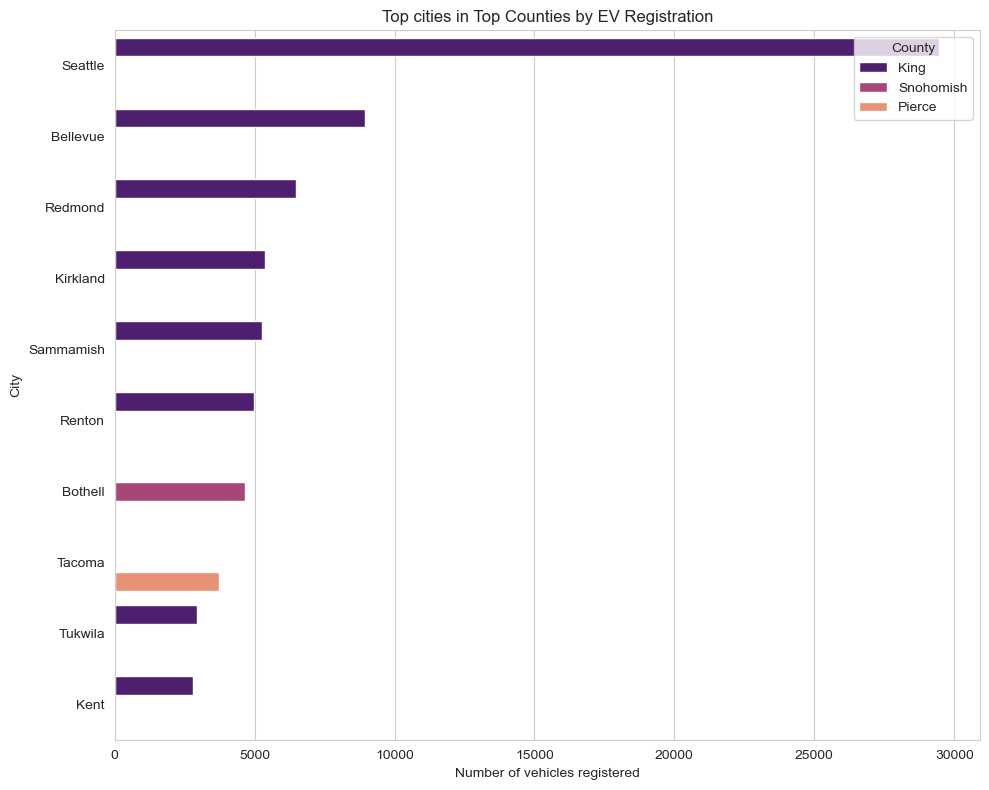

In [53]:
#EV MARKET SIZE ANALYSIS
plt.figure(figsize=(10,8))
sns.barplot(x='Name of Vehicles', y='City', hue= 'County', data= top_cities,palette='magma')
plt.title('Top cities in Top Counties by EV Registration')
plt.xlabel('Number of vehicles registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [ ]:
#BEV and PHEV vehicle
ev_type_distribution= ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,palette= 'rocket')
plt.title('Distribution of Elctric Vehicle Types')
plt.xlabel('Number of Vehicle Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [ ]:
#analyzing the popular of EV manufacturing
ev_make_distribution= ev_data['Make'].value_counts().head(10) #Top 10 EV makes

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette= 'cubehelix')
plt.title('top 10 popular EV makes')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [69]:
#selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes= ev_make_distribution.head(3).index

#filtering the dataset for these top manufacturers
top_makes_data= ev_data[ev_data['Make'].isin(top_3_makes)]

#Analyzing the popular of EV models within these top manufacturers
ev_model_distribution_top_makes= top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')

#Visualizing the top 10 models across these manufacturers for clarity 
top_models= ev_model_distribution_top_makes.head(10)

top_models

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


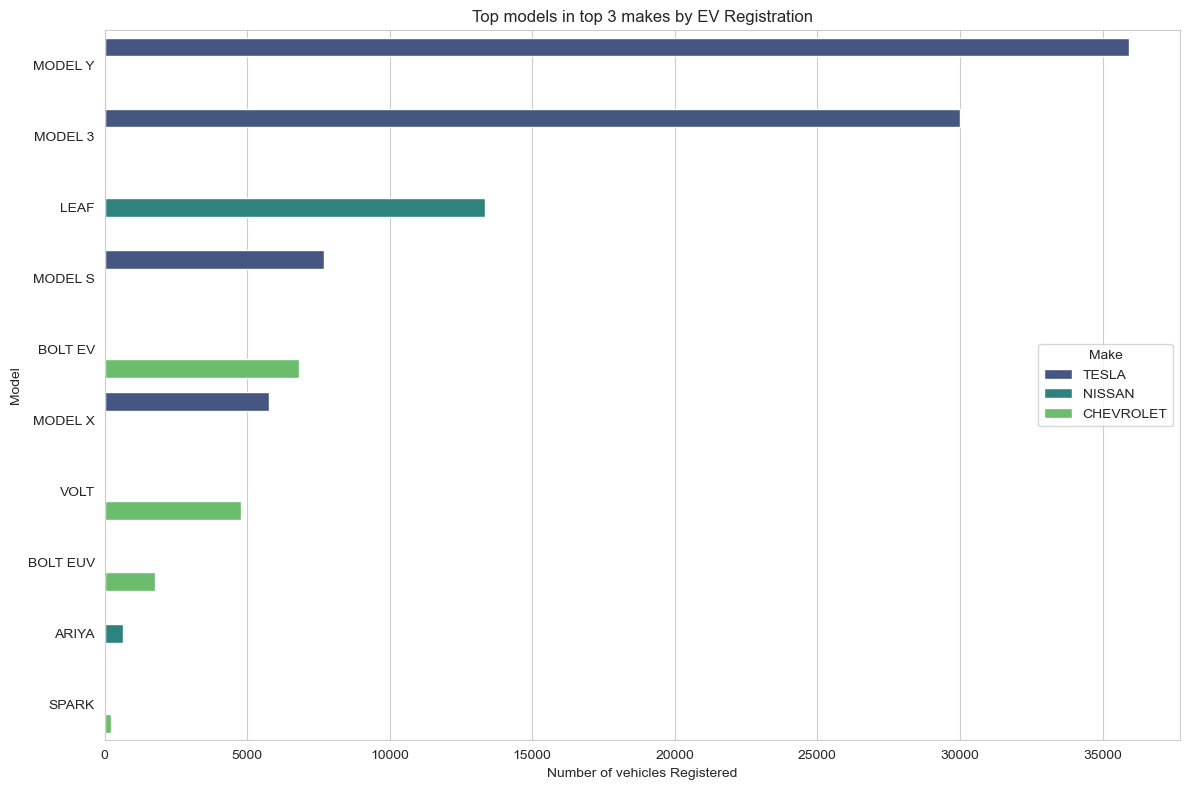

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of vehicles', y='Model', hue='Make', data=top_models, palette='viridis')
plt.title('Top models in top 3 makes by EV Registration')
plt.xlabel('Number of vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


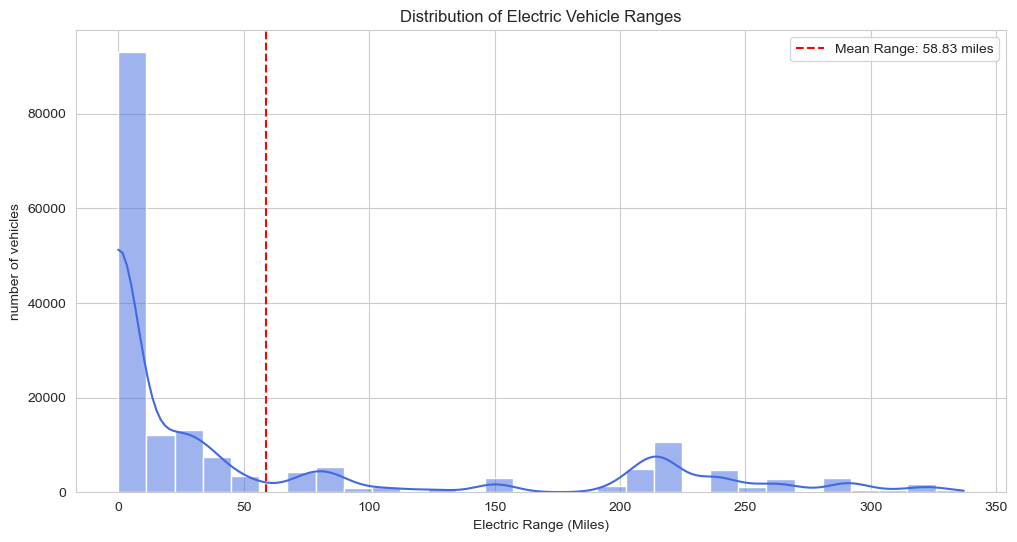

In [105]:
#analyzing the distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins= 30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('number of vehicles')
# plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--',label= f'Mean Range: {ev_data['Electric Range'].mean():.2f} miles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle= '--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')

plt.legend()
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


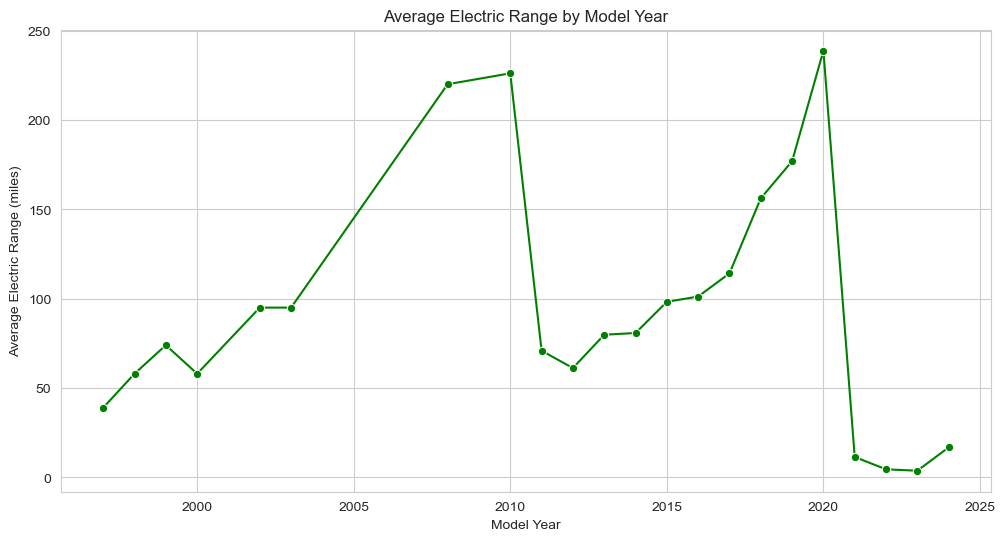

In [107]:
# calculating thr average electric range by model year

average_range_by_year= ev_data.groupby('Model Year') ['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year', y='Electric Range', data= average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

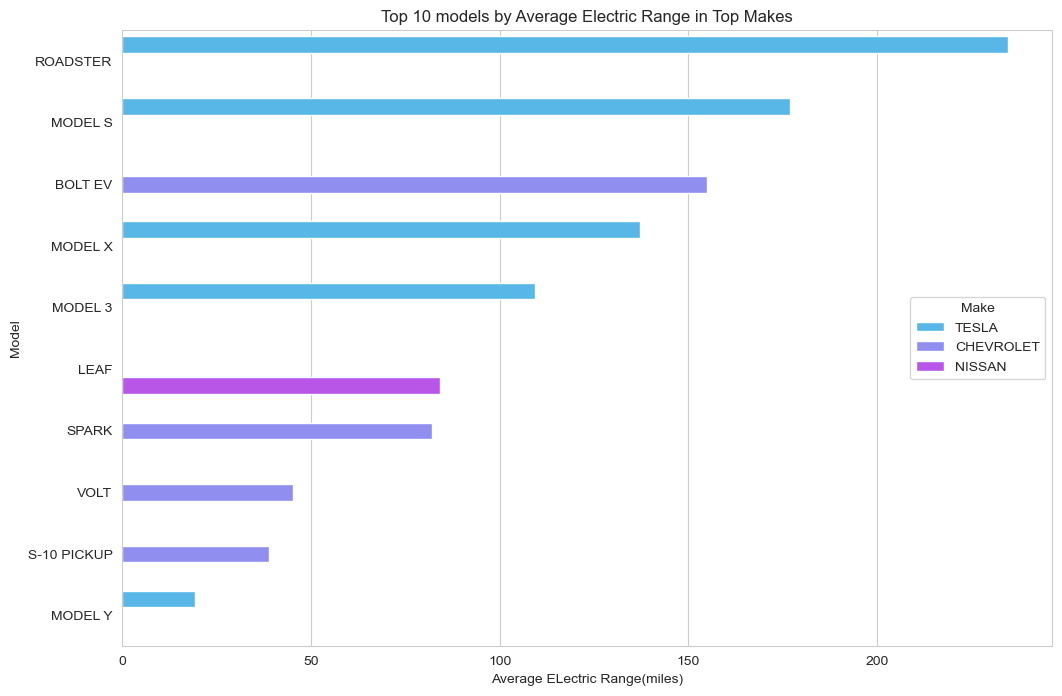

In [117]:
averange_range_by_model= top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

#the top 10 models with the highest average electric range
top_range_model=averange_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot= sns.barplot(x='Electric Range', y= 'Model', hue='Make', data= top_range_model, palette='cool')
plt.title('Top 10 models by Average Electric Range in Top Makes')
plt.xlabel('Average ELectric Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()

In [119]:
#calculate the number of ev's registered each year
ev_registration_counts= ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts


Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [129]:
from scipy.optimize import curve_fit
import numpy as np
filtered_years= ev_registration_counts[ev_registration_counts.index<=20023]

def exp_growth(x,a,b):
    return a*np.exp(b*x)

x_data= filtered_years.index - filtered_years.index.min()
y_data= filtered_years.values

params,covariance= curve_fit(exp_growth, x_data, y_data)

forecast_years= np.arange(2024,2024+6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years,*params)

forecasted_evs= dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
print(forecasted_evs)

{2024: 32025.665163987058, 2025: 38169.83047608552, 2026: 45492.76185562057, 2027: 54220.60709829103, 2028: 64622.90074710049, 2029: 77020.88789598273}


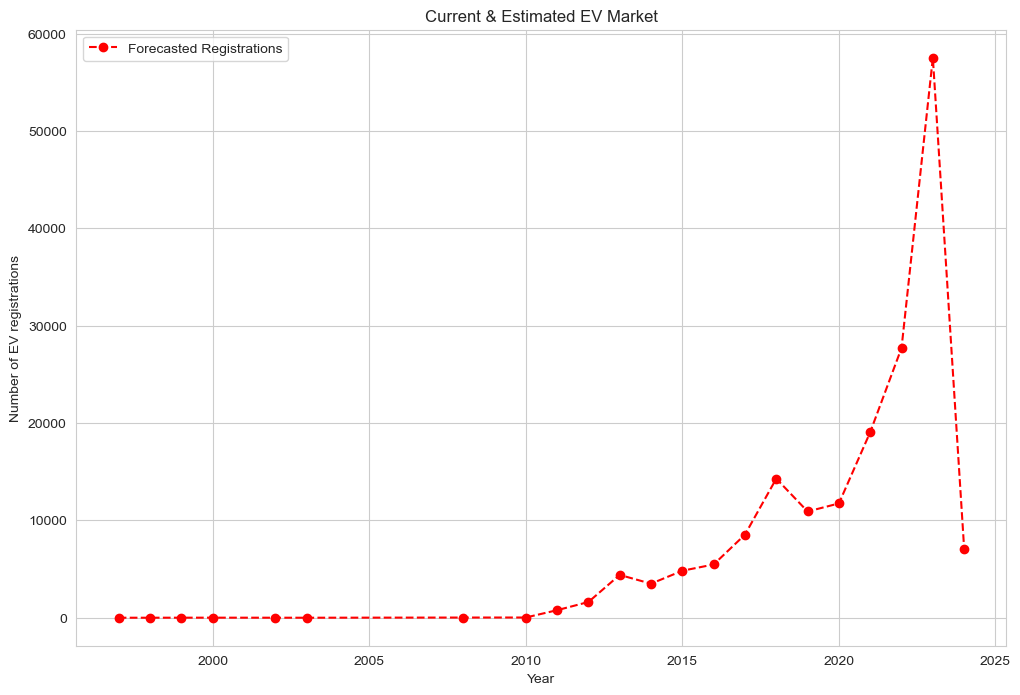

In [139]:
years= np.arange(filtered_years.index.min(),2029+1)
actual_years=filtered_years.index
forecast_years_full= np.arange(2024,2029+1)

actual_values= filtered_years.values
forecasted_values_full= [forecasted_evs[year] for year in forecast_years_full]
plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values, 'ro--', label= 'Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV registrations')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
ev_postalcode_distribution = ev_data['Postal Code'].value_counts()
top_registration= ev_postalcode_distribution.head(10).index

#filterinf data for these top countries
top_postalcodes_data= ev_data[ev_data['Postal Code'].isin(top_registration)]
top_postalcodes_data
#Analyzing the distribution of EV's within county
ev_counties_distribution_top_postalcodes= top_postalcodes_data.groupby(['Postal Code', 'Model Year']).size().sort_values(ascending=False).reset_index(name= 'Number of Vehicles')

#visulize the top 10 Postal codes across the rcounties
top_postalcodes=  ev_counties_distribution_top_postalcodes.head(10)
top_postalcodes


,Postal Code,Model Year,Number of Vehicles
0,98188.0,2023,1988
1,98052.0,2023,1734
2,98012.0,2023,1433
3,98006.0,2023,1034
4,98004.0,2023,941
5,98033.0,2023,940
6,98074.0,2023,927
7,98034.0,2023,785
8,98115.0,2023,766
9,98052.0,2022,764


C:\Users\hp\AppData\Local\Temp\ipykernel_7480\3133079186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_postalcodes['Postal Code'] = top_postalcodes['Postal Code'].astype(str)
C:\Users\hp\AppData\Local\Temp\ipykernel_7480\3133079186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_postalcodes['Model Year'] = top_postalcodes['Model Year'].astype(str)


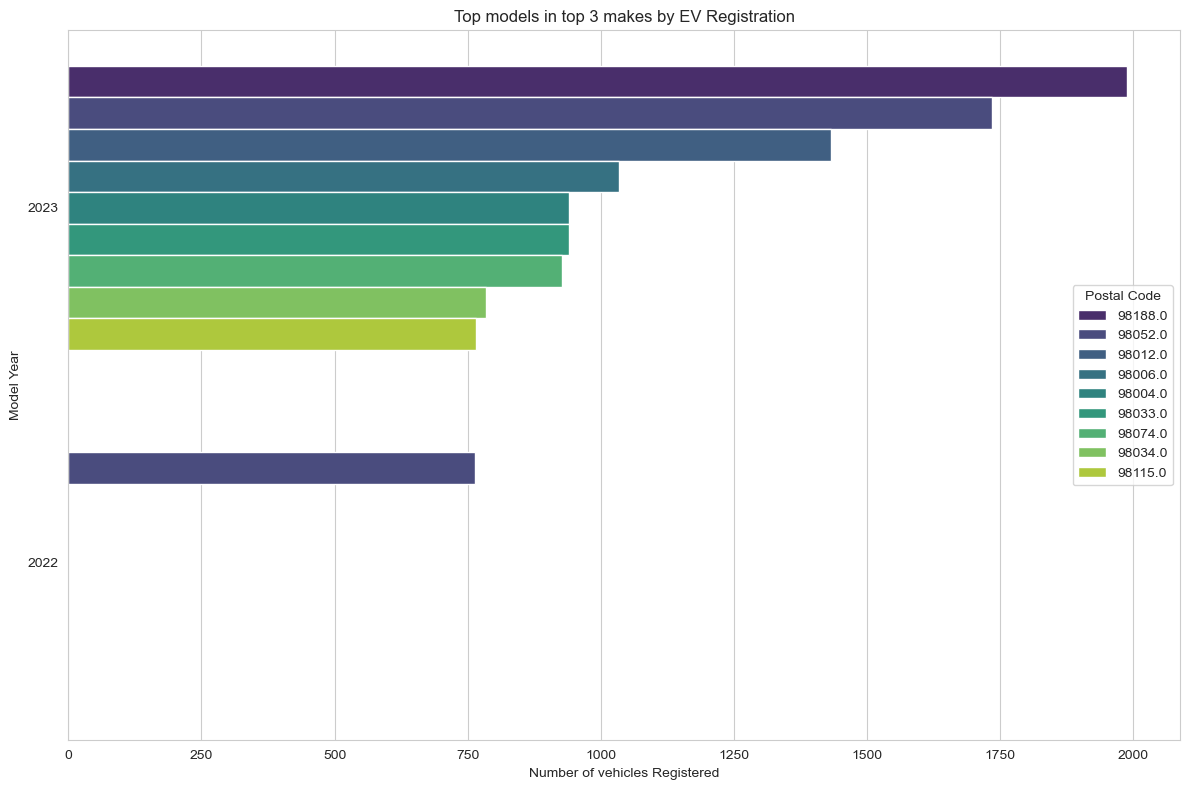

In [39]:
# Convert Postal Code and Model Year to strings if needed
top_postalcodes['Postal Code'] = top_postalcodes['Postal Code'].astype(str)
top_postalcodes['Model Year'] = top_postalcodes['Model Year'].astype(str)

# Plot the barplot again
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='Model Year', hue='Postal Code', data=top_postalcodes, palette='viridis')
plt.title('Top models in top 3 makes by EV Registration')
plt.xlabel('Number of vehicles Registered')
plt.ylabel('Model Year')
plt.legend(title='Postal Code', loc='center right')
plt.tight_layout()
plt.show()


In [48]:

# Most common legislative district
common_legislative_district = ev_data['Legislative District'].value_counts().idxmax()

common_legislative_district


41.0

In [54]:
# Most common electric utility provider
common_utility_provider = ev_data['Electric Utility'].value_counts().idxmax()

common_utility_provider


'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)'

In [56]:
state= ev_data['State'].value_counts()
state

State
WA    177473
Name: count, dtype: int64